<a href="https://colab.research.google.com/github/JackSD/Data-Science-Work/blob/master/study_of_volatilty.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Test of various measures of normalized volatility for various Time series

Goal is to capture volatility in a time series of portfolio values in a ** scale invariant way. ** and one which captures volatility on top of a base of capital

the coefficient of variation has 2 problems

1) it is less effective work when there is a base value (eg a base of capital)

2) it is lower with more volatility (ie many transactions in and out lowers the COV as the SD increases)




In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import statistics as stats
import numpy as np
import math

In [55]:
# GOOD EXAMPLES (5)

list_of_time_series = []

#normal - joiner
list_of_time_series.append([100,101,102,103,104,105,105,107,110,111,112,113,114,115])
# same multiplied by 10
multiplied_list = [element * 10 for element in list_of_time_series[0]]
list_of_time_series.append(multiplied_list)
#normal - leaver
list_of_time_series.append([100,101,102,103,104,105,105,107,110,111,112,113,114,0])
multiplied_list = [element * 10 for element in list_of_time_series[len(list_of_time_series)-1]]
# same multiplied by 10
list_of_time_series.append(multiplied_list)
#normal - volatile
list_of_time_series.append([100,110,120,130,120,110,100,95,90,85,100,111,112,120])

# BAD EXAMPLES (5)

list_of_time_series_bad = []
#1 transaction in and out
list_of_time_series_bad.append([100,0,0,0,0,0,0,0,0,0,0,0,0,0])
list_of_time_series_bad.append([100,0,0,0,0,0,0,0,0,0,0,0,0,100])
#many transactions in and out
list_of_time_series_bad.append([500,0,0,0,0,500,0,0,0,0,500,0,0,0])

#many transactions in and out, on base of capital 
multiplied_list = [element + 1000 for element in list_of_time_series_bad[len(list_of_time_series_bad)-1]]
list_of_time_series_bad.append(multiplied_list)

#high freq transactions in and out, on a base of capital 
list_of_time_series_bad.append([500,0,500,0,500,0,500,0,500,0,500,0,500,0])
multiplied_list = [element + 1000 for element in list_of_time_series_bad[len(list_of_time_series_bad)-1]]
list_of_time_series_bad.append(multiplied_list)




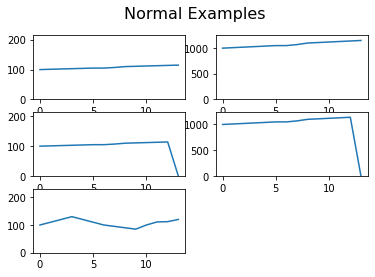

In [56]:
#show the time series graphically:
for i in range(len(list_of_time_series)):
    plt.subplot(3, 2, i+1)
    plt.ylim(0, max(list_of_time_series[i])+100)
    plt.plot(list_of_time_series[i])
    # Show/save figure as desired.

plt.suptitle('Normal Examples', fontsize=16)
plt.show()


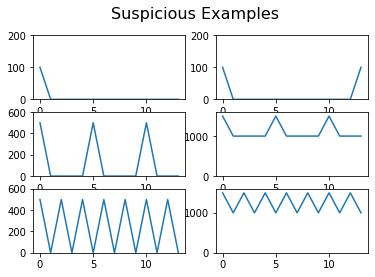

In [57]:
#show the time series graphically:
for i in range(len(list_of_time_series_bad)):
    plt.subplot(3, 2, i+1)
    plt.ylim(0, max(list_of_time_series_bad[i])+100)
    plt.plot(list_of_time_series_bad[i])
    
    # Show/save figure as desired.
plt.suptitle('Suspicious Examples', fontsize=16)
plt.show()


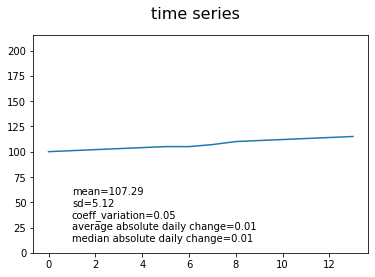

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


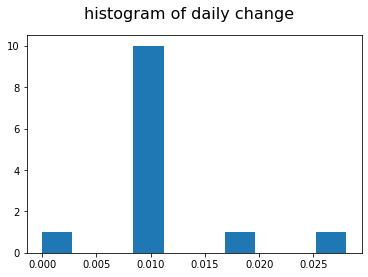

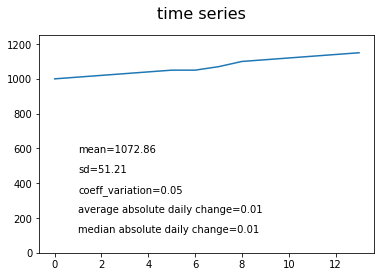

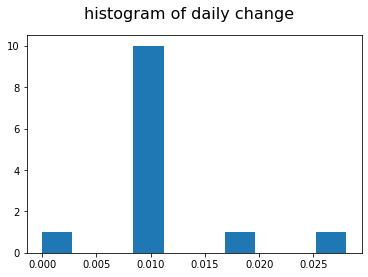

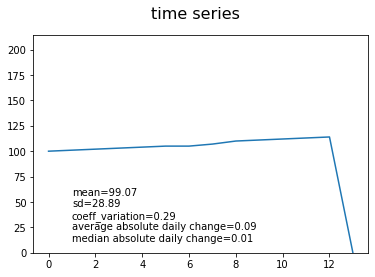

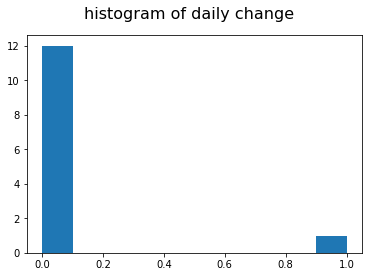

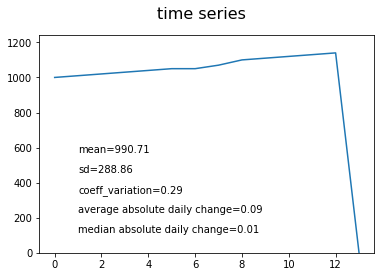

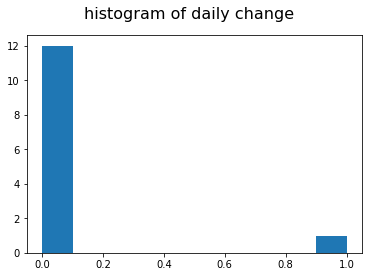

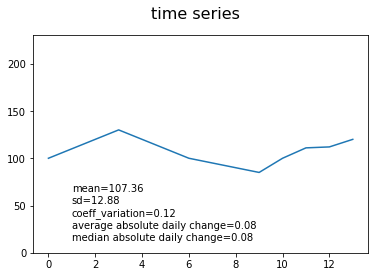

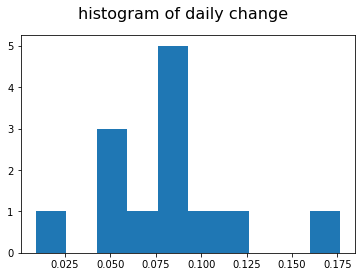

In [58]:
#show the co-efficient of variation (sd/mean)
list_of_time_series_percent_change=[]
for i in range(len(list_of_time_series)):
    plt.plot(list_of_time_series[i])
    plt.ylim(0, max(list_of_time_series[i])+100)
    plt.text( 1,max(list_of_time_series[i])*5/10,'mean=' + str(round(stats.mean(list_of_time_series[i]),2)) )
    plt.text(1,max(list_of_time_series[i])*4/10,'sd=' + str(round(stats.stdev(list_of_time_series[i]),2)) )
    plt.text(1,max(list_of_time_series[i])*3/10,'coeff_variation=' + str(round(stats.stdev(list_of_time_series[i])/stats.mean(list_of_time_series[i]),2) ))
    
    percent_series = pd.Series(list_of_time_series[i])
    a = percent_series.pct_change()
    a = [1 if x==float("inf") else abs(x) for x in a]
    
    plt.text(1,max(list_of_time_series[i])*2/10,'average absolute daily change=' + str(round(np.nanmean(a),2) ) )
    plt.text(1,max(list_of_time_series[i])*1/10,'median absolute daily change=' + str(round(np.nanmedian(a),2) ) )
    list_of_time_series_percent_change.append(a)
    
    plt.suptitle('time series', fontsize=16)
    plt.show()

    plt.hist(a)
    plt.suptitle('histogram of daily change', fontsize=16)
    plt.show()


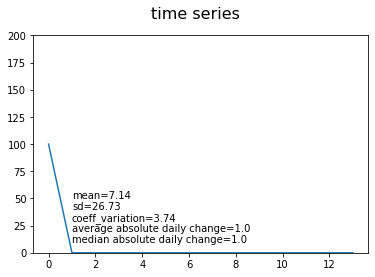

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


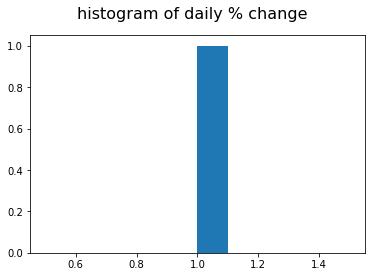

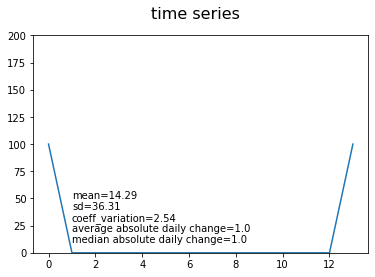

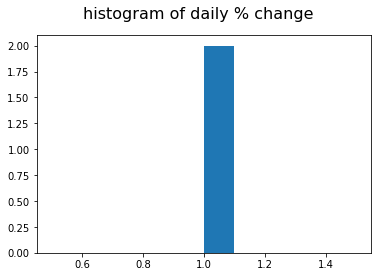

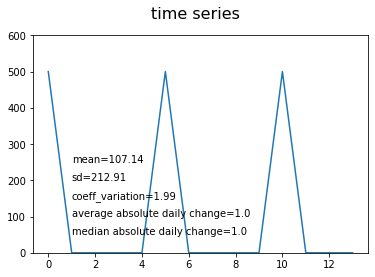

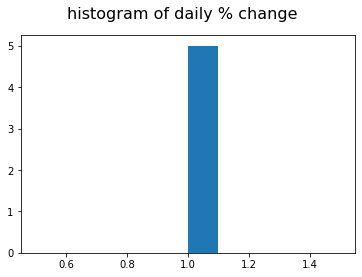

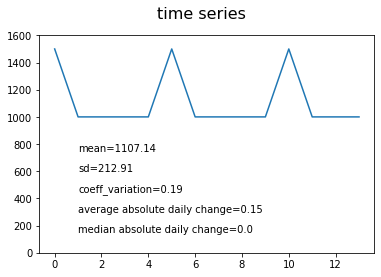

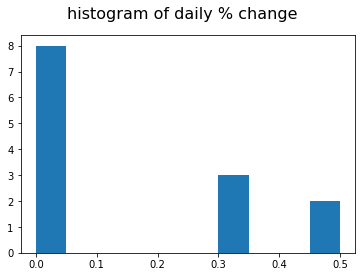

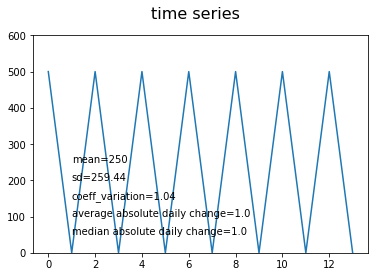

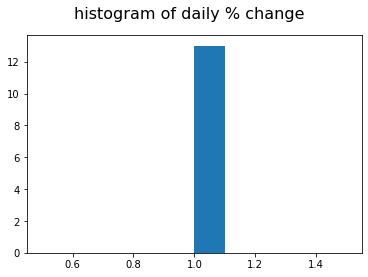

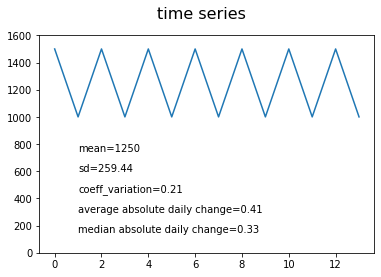

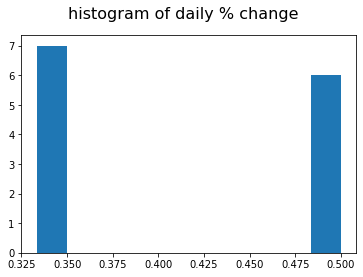

In [62]:
#show the co-efficient of variation (sd/mean)

for i in range(len(list_of_time_series_bad)):
    plt.plot(list_of_time_series_bad[i])
    plt.ylim(0, max(list_of_time_series_bad[i])+100)
    plt.text( 1,max(list_of_time_series_bad[i])*5/10,'mean=' + str(round(stats.mean(list_of_time_series_bad[i]),2)) )
    plt.text(1,max(list_of_time_series_bad[i])*4/10,'sd=' + str(round(stats.stdev(list_of_time_series_bad[i]),2)) )
    plt.text(1,max(list_of_time_series_bad[i])*3/10,'coeff_variation=' + str(round(stats.stdev(list_of_time_series_bad[i])/stats.mean(list_of_time_series_bad[i]),2) ))
    
    percent_series = pd.Series(list_of_time_series_bad[i])
    a = percent_series.pct_change()
    #else 0 if math.isnan(x)  the below ignores 0-0 changes (as nan)
    a = [1 if x==float("inf") else abs(x) for x in a]

    plt.text(1,max(list_of_time_series_bad[i])*2/10,'average absolute daily change=' + str(round(np.nanmean(a),2) ) )
    plt.text(1,max(list_of_time_series_bad[i])*1/10,'median absolute daily change=' + str(round(np.nanmedian(a),2) ) )
    list_of_time_series_percent_change.append(a)
    
    plt.suptitle('time series', fontsize=16)
    plt.show()

    plt.hist(a)
    plt.suptitle('histogram of daily % change', fontsize=16)
    plt.show()